# This is our notebook

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk, load_MLCup
from src.model import MLP
from src.Optimizers import HBG, CG
from src.GridSearch import GridSearch
from src.EarlyStopping import EarlyStopping

In [2]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X_train, y_train = load_MLCup(path + file_train, labels_train)
X_test = load_MLCup(path + file_test, labels_test)

### Grid Search

For each architecture, we find the set of parameters with best training objective.

HBG

In [1]:
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'

params_grid = {
    'alpha' : [0.01, 0.05, 0.1],
    'beta' : [0.7, 0.8, 0.9],
}

Shallow architecture

In [2]:
model = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)


NameError: name 'MLP' is not defined

Deep architecture

In [8]:
model = MLP([20, 40, 20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

Grid search of 9 combinations.


100%|██████████| 9/9 [00:00<00:00, 10485.76it/s]




Parameters of best model, evaluated on training_objective: {'alpha': 0.05, 'beta': 0.8}
Validation error on 1 folds for best model: [1.629805108422595]
Mean validation error: 1.629805108422595


Linear NN (convex optimization)

In [12]:
params_grid = {
    'alpha' : [0.001, 0.005, 0.01], #smaller steps, otherwise we incur in gradient exploding
    'beta' : [0.7, 0.8, 0.9],
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

Grid search of 9 combinations.


100%|██████████| 9/9 [00:00<00:00, 7479.44it/s]




Parameters of best model, evaluated on training_objective: {'alpha': 0.005, 'beta': 0.9}
Validation error on 1 folds for best model: [3.004868135048993]
Mean validation error: 3.004868135048993


CG

We perform a different grid search for each beta type

In [ ]:
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'

params_grid = {
    'm2' : [0.3, 0.4, 0.5],
    'm1' : [0.1, 0.2]
}

Shallow architecture

Deep architecture

### Experiments

30.190891416118905
30.13699746044644
30.245064802905528
30.14471974098783
30.134675011613137
3.019545634436436
3.019665626887003
3.0194080107293204
3.019540029448963
3.0195369885284764


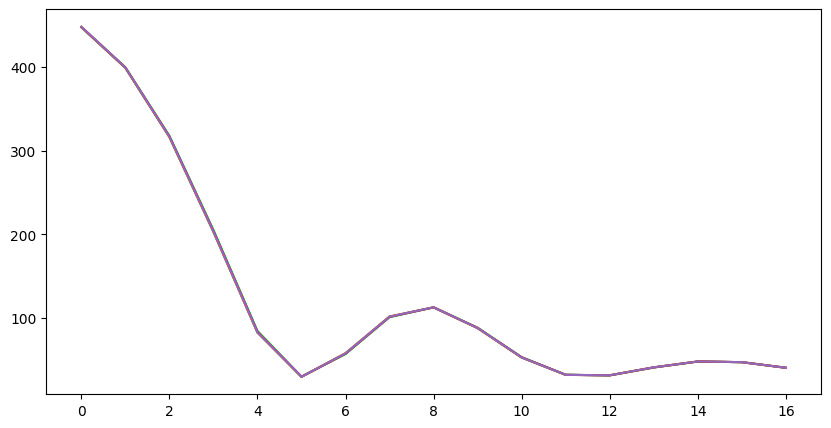

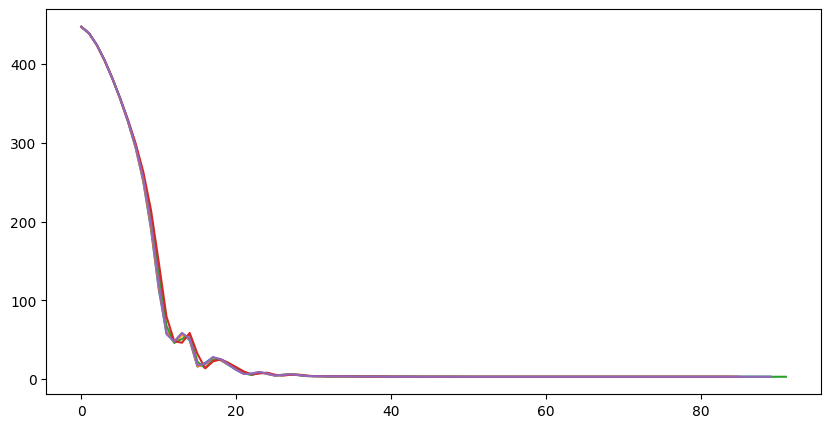

In [3]:
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'obj_tol'
verbose = False

early_stopping = EarlyStopping()

mlp_shallow = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_deep = MLP([20, 40, 20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_linear = MLP([20], 9, 2, task = "regression", activation_function = 'id')

optimizer = HBG(loss = loss, regularization_function = regularization, stopping_criterion = stopping_criterion, early_stopping = early_stopping)

for mlp, alpha, beta in zip([mlp_shallow, mlp_deep, mlp_linear], [0.01, 0.05, 0.005], [0.8, 0.8, 0.9]):
    fig, ax = plt.subplots(1,1, figsize = (10,5))

    for i in range(5):
        mlp.initialize()
        optimizer.initialize(mlp, alpha = 0.01, beta = 0.8, stopping_value = 1e-3, alpha_l2 = 0.001, verbose = verbose)
        optimizer.fit_model(X_train, y_train)
        ax.plot(optimizer.obj_history, label = 'HBG objective function')
        print(np.min(optimizer.obj_history))

beta
0
LS
447.80000580497784 -5006.035466480421
first loop
-5003.003410739644
first loop
-4999.634528218817
first loop
-4995.8914097421175
first loop
-4991.732493317021
first loop
-4987.111603591883
first loop
-4981.9774403489455
first loop
-4976.273010418602
first loop
-4969.934996788247
first loop
-4962.8930580013175
first loop
-4955.0690501923
first loop
-4946.376163274384
first loop
-4936.71796188036
first loop
-4925.987320645585
first loop
-4914.065242305326
first loop
-4900.819545847718
first loop
-4886.103410607258
first loop
-4869.7537606912965
first loop
-4851.589472491207
first loop
-4831.409386228938
first loop
-4808.990100515468
first loop
-4784.08352673726
first loop
-4756.414177727682
first loop
-4725.676162609201
first loop
-4691.529856897775
first loop
-4653.5982139321095
first loop
-4611.462680419366
first loop
-4564.658675369224
first loop
-4512.670587918689
first loop
-4454.926245534199
first loop
-4390.790799825648
first loop
-4319.559972738375
first loop
-4240.4526

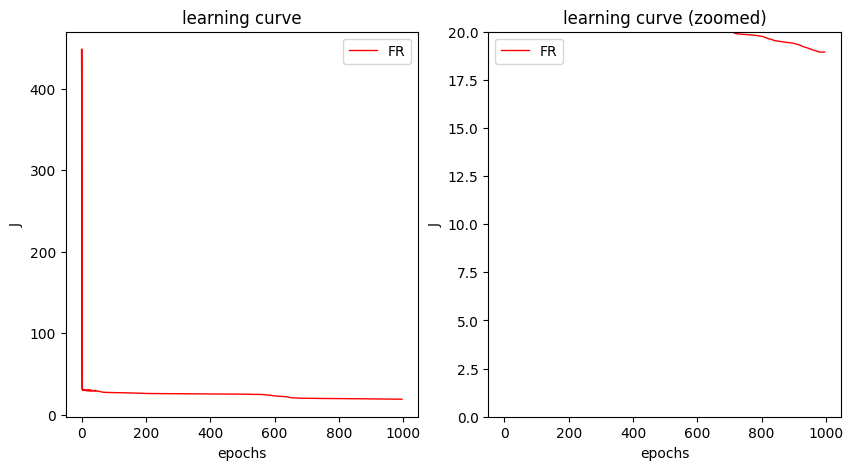

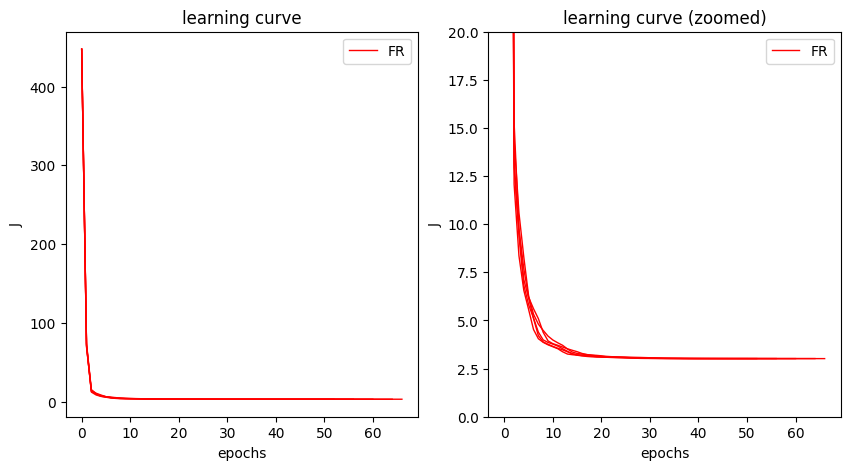

In [3]:
alpha_l2 = 0.001
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'obj_tol'
verbose = False

early_stopping = EarlyStopping()

mlp_shallow = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_deep = MLP([20, 40, 20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_linear = MLP([20], 9, 2, task = "regression", activation_function = 'id')

optimizer = CG(loss, regularization, stopping_criterion, early_stopping)
beta_color = {'FR' : 'r', 'HS+' : 'b', 'PR+' : 'y'}

for mlp in [mlp_deep, mlp_linear]:
    
    fig, ax = plt.subplots(1,2, figsize = (10,5))

    for beta in ['FR', 'HS+', 'PR+']: 

        for i in range(5):

            mlp.initialize()
            optimizer.initialize(mlp, beta_type = beta, stopping_value = 1e-3, alpha_l2 = alpha_l2, verbose = verbose)
            optimizer.fit_model(X_train, y_train)
            line, = ax[0].plot(optimizer.obj_history, beta_color[beta], linewidth = 1)
            line_zoom, = ax[1].plot(optimizer.obj_history, beta_color[beta], linewidth = 1)
            if i == 1:
                line.set_label(beta)
                line_zoom.set_label(beta)
            ax[1].set_ylim(0,20)
            print(np.min(optimizer.obj_history))

    ax[0].legend()
    ax[1].legend()

    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("J")
    ax[0].set_title("learning curve")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("J")
    ax[1].set_title("learning curve (zoomed)")